In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [3]:
device = 'mps'

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.1307, 0.3081)
])

In [9]:
train_data = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=True,
    download=True,
    transform=transform
)
test_data = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,    
    download=True,
    transform=transform
)

Using downloaded and verified file: ./fashion_mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz
Extracting ./fashion_mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./fashion_mnist/FashionMNIST/raw

Using downloaded and verified file: ./fashion_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./fashion_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./fashion_mnist/FashionMNIST/raw

Using downloaded and verified file: ./fashion_mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./fashion_mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./fashion_mnist/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5345946.27it/s]

Extracting ./fashion_mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./fashion_mnist/FashionMNIST/raw


In [10]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [11]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.net(x)

In [12]:
model = DNN().to(device)
model

DNN(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=64, bias=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [13]:
loss_fn = nn.CrossEntropyLoss()

In [14]:
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=0.01,
    momentum=0.5
)

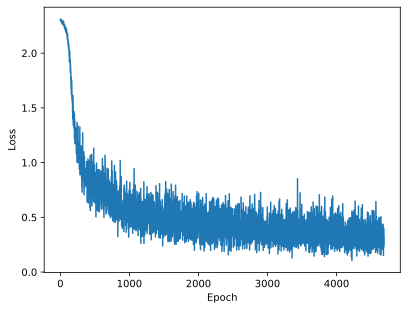

In [15]:
epochs = 5
losses = []

for epoch in range(epochs):
    for (x, y) in train_loader:
        x, y = x.to(device), y.to(device)
        Pred = model(x)
        loss = loss_fn(Pred, y)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Fig = plt.figure()
plt.plot(range(len(losses)), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [16]:
correct = 0
total = 0

with torch.no_grad():
    for(x, y) in test_loader:
        x, y = x.to(device), y.to(device)
        Pred = model(x)
        _, predicted = torch.max(Pred.data, dim=1)
        correct += torch.sum((predicted == y))
        total += y.size(0)

print('Accuracy: {:.2f}%'.format(correct / total * 100))

Accuracy: 86.18%
